## Data Description
Dataset de músicas de diversos artistas no mundo:

Neste notebook nós vamos analizar os dados profundamente e tentar obter alguns insights úteis como **top artists,trending music** etc

### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Configurando o matplotlib para mostrar os gráficos no jupyter notebook
%matplotlib inline
sns.set_theme(style="darkgrid")
# Carregando o dataset
df = pd.read_csv('data/Spotify_Youtube.csv')

In [3]:
# Eliminando colunas desnecessárias para a nossa a análise
df.drop(['Unnamed: 0','Url_spotify', 'Description','Uri','Url_youtube','Licensed'], axis='columns', inplace=True)

In [4]:
# Lidando com valores em falta. Preenchendo NA nos likes com 0
#Preenchendo NA nos comments com 0 #Eliminando outros
df['Likes'] = df['Likes'].fillna(0)
df['Comments'] = df['Comments'].fillna(0)
df.dropna(inplace=True)
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
official_video      0
Stream              0
dtype: int64

In [5]:
#O dataset tem 19691 linhas e 22 colunas
df.shape

(19691, 22)

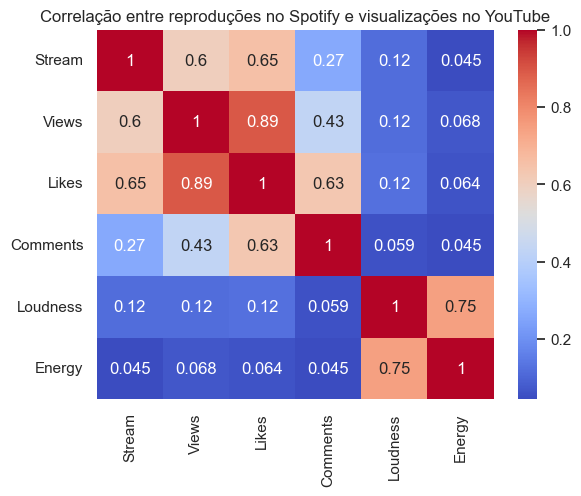

In [6]:
correlation_matrix = df[['Stream', 'Views','Likes', 'Comments','Loudness', 'Energy']].corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlação entre reproduções no Spotify e visualizações no YouTube')
plt.show()

In [7]:
df = df.sort_values(by='Views', ascending=False)
grupo_artista = df.groupby('Artist')
top_musicas = []


In [8]:
for nome, grupo in grupo_artista:
    top_musicas.extend(grupo.nlargest(10, 'Views').assign(stream_spotify=grupo['Stream'].tolist()).values.tolist())
artistas = [m[0] for m in top_musicas]
nomes_musicas = [m[1] for m in top_musicas]
visualizacoes = [m[2] for m in top_musicas]
streams = [m[4] for m in top_musicas]

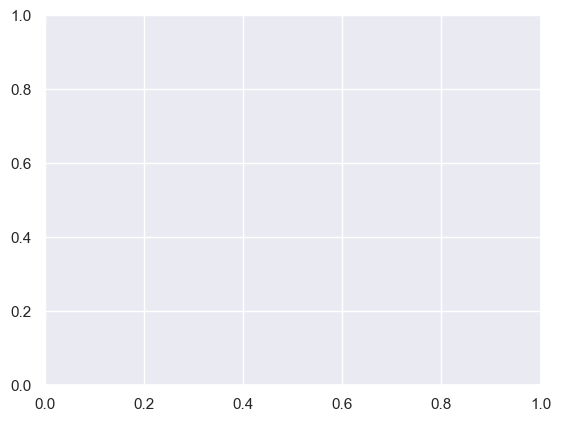

In [9]:
fig, ax = plt.subplots()
bar_width = 0.35
r1 = range(0, len(top_musicas)*2, 2)
r2 = [x + bar_width for x in r1]


In [ ]:
ax.bar(r1, visualizacoes, color='r', width=bar_width, label='Visualizações')
ax.bar(r2, streams, color='b', width=bar_width, label='Streams do Spotify')
ax.set_xlabel('Música')
ax.set_ylabel('Visualizações / Streams')
ax.set_title('Top 10 músicas de cada artista')
ax.set_xticks([r + bar_width / 2 for r in range(0, len(top_musicas)*2, 2)])
ax.set_xticklabels(nomes_musicas, rotation=90)
ax.legend()
plt.show()